<a href="https://colab.research.google.com/github/OliverEkka/brain_tumor_detect/blob/main/brain_tumor_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install roboflow

from google.colab import userdata

from roboflow import Roboflow
rf = Roboflow(api_key=userdata.get('roboflow_key'))
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:00<00:00, 6524.94it/s]


In [7]:
dataset.location

'/content/BRAIN-TUMOR-1'

In [10]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 45.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# !pip install ultralytics
# from ultralytics import YOLO

# # Load a model
# model = YOLO("yolo11n-seg.pt")

# # Train the model
# train_results = model.train(
#     data="/content/BRAIN-TUMOR-1/data.yaml",  # path to dataset YAML
#     epochs=10,  # number of training epochs
#     imgsz=640,  # training image size
#     device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
# )

!yolo task=segment mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=20 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 364MB/s]
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/BRAIN-TUMOR-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agno


image 1/3 /content/test_images/1.jpg: 640x640 1 tumor, 11.1ms
image 2/3 /content/test_images/2.jpg: 640x640 1 tumor, 8.5ms
image 3/3 /content/test_images/3.jpg: 640x640 1 tumor, 8.4ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


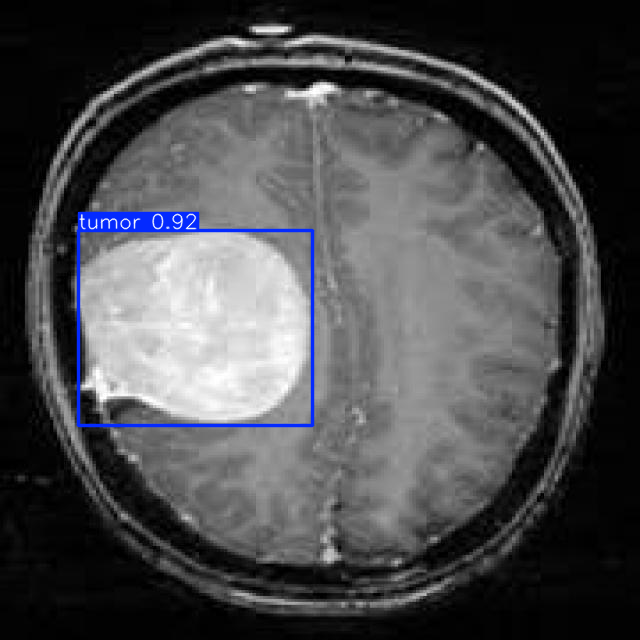

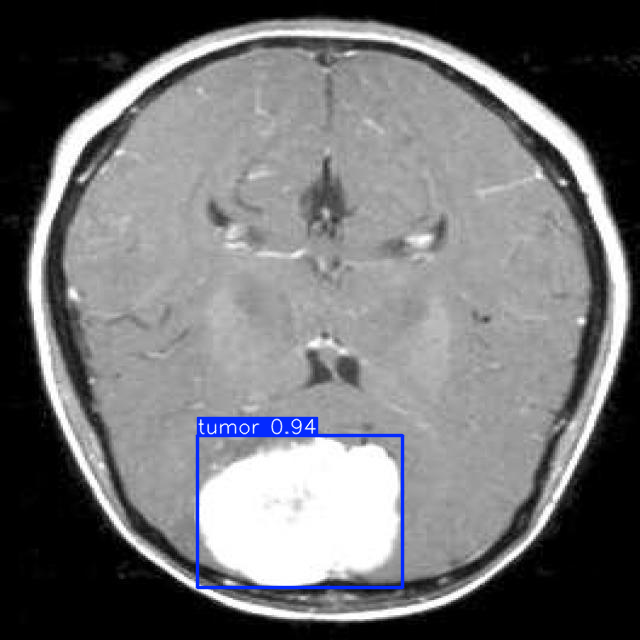

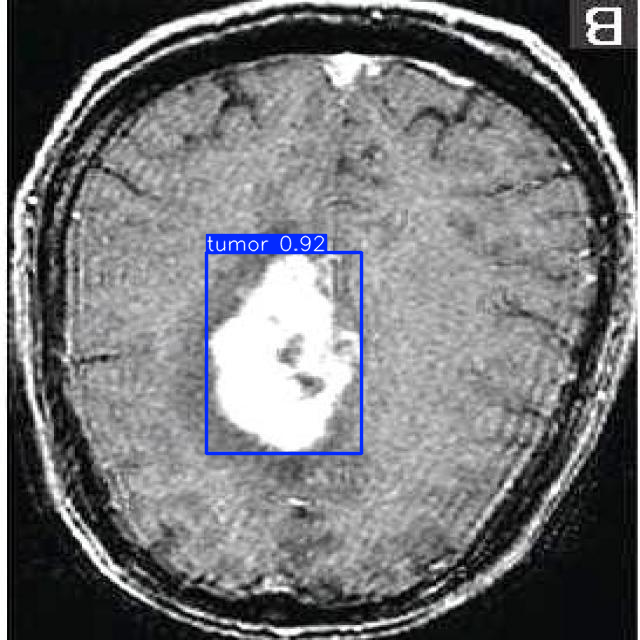

In [15]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/test_images/*.jpg', save=True)
results[0].show()
results[1].show()
results[2].show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
!nvidia-smi

Thu Nov  7 17:20:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--